<a href="https://colab.research.google.com/github/laugustovieira/prophet_covid/blob/main/prophet_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#modulo 03 aula 01 

In [48]:
url = '/content/drive/MyDrive/Dados_BootCamp/dados_covid_sp.csv'

In [49]:
import pandas as pd

In [50]:
dados = pd.read_csv(url, sep=";")

In [51]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [52]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

In [53]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

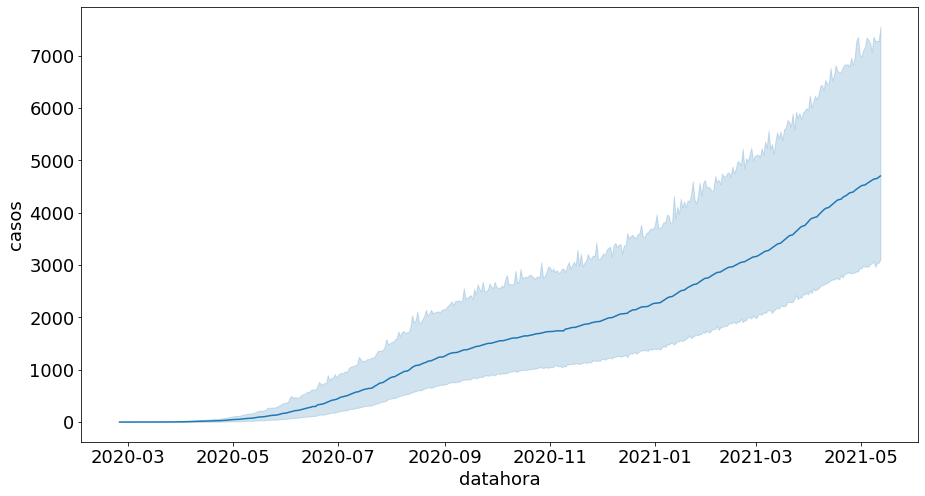

In [54]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)
sns.lineplot(x = "datahora", y="casos", data = dados)

# $$ e^x $$

In [55]:
import numpy as np

In [56]:
eixo_x = np.linspace(-2,2,100)

In [57]:
y_exp = np.exp(eixo_x)

Exemplo de curva logaritmica usando o numpy

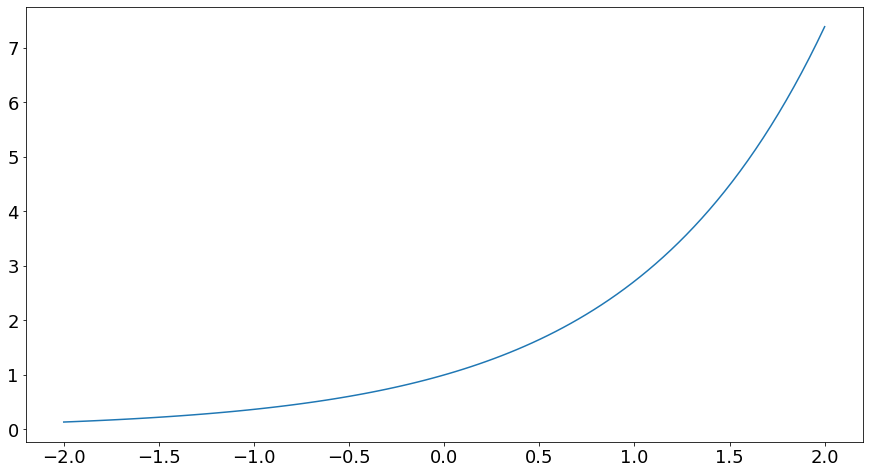

In [58]:
sns.lineplot(x=eixo_x, y = y_exp)

# $$log_2 2 = 1 $$
# $$log_2 2^x = X $$
# $$log_e e^x = x $$

Existe um crescimento exponencial para os dados. A reta mostra que o crecimento é ordenado

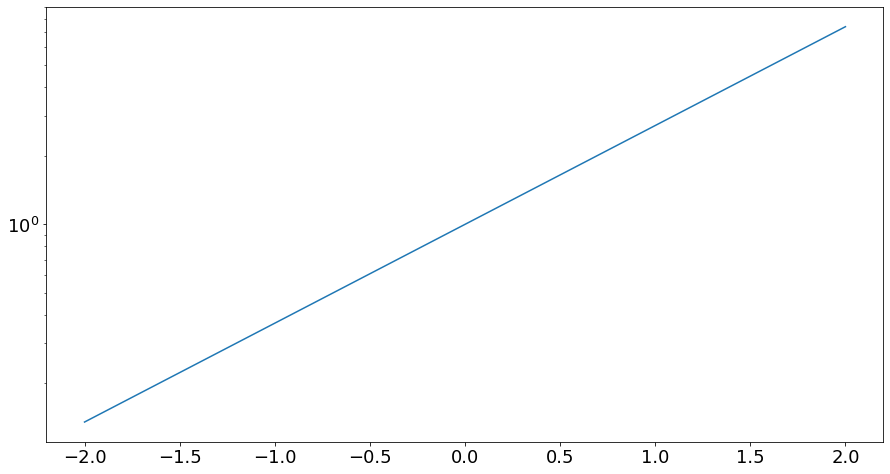

In [59]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [60]:
dados_sp = dados.query("nome_munic == 'São Paulo'")

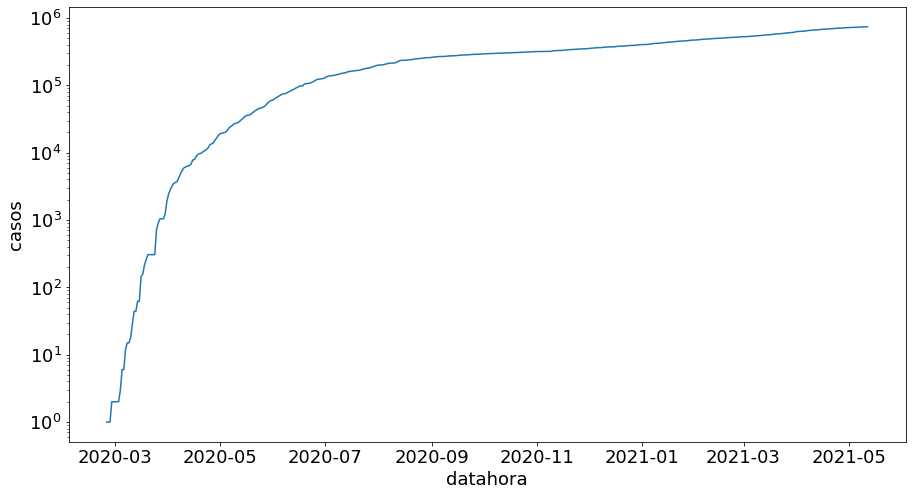

In [61]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

Crescimento exponencial do estado de são paulo. Não ordenado , porém é um crescimento exponencial

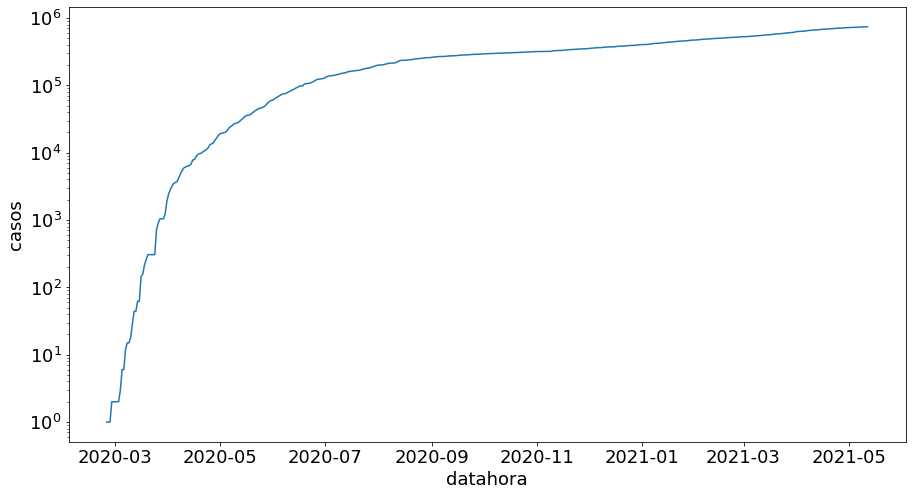

In [62]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

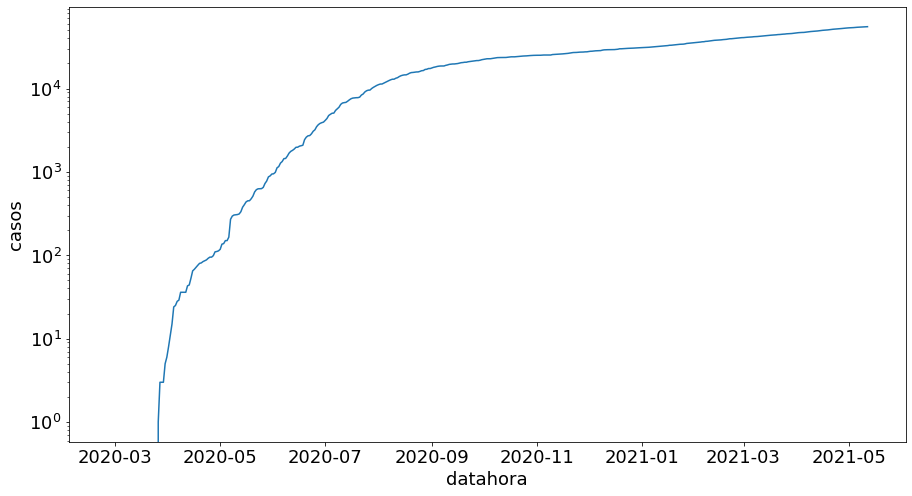

In [63]:
dados_rp = dados.query("nome_munic == 'Ribeirão Preto'")
sns.lineplot(x="datahora", y="casos", data=dados_rp)
mpl.pyplot.yscale("log")

#modulo 03 aula 01 

casos novos de covid

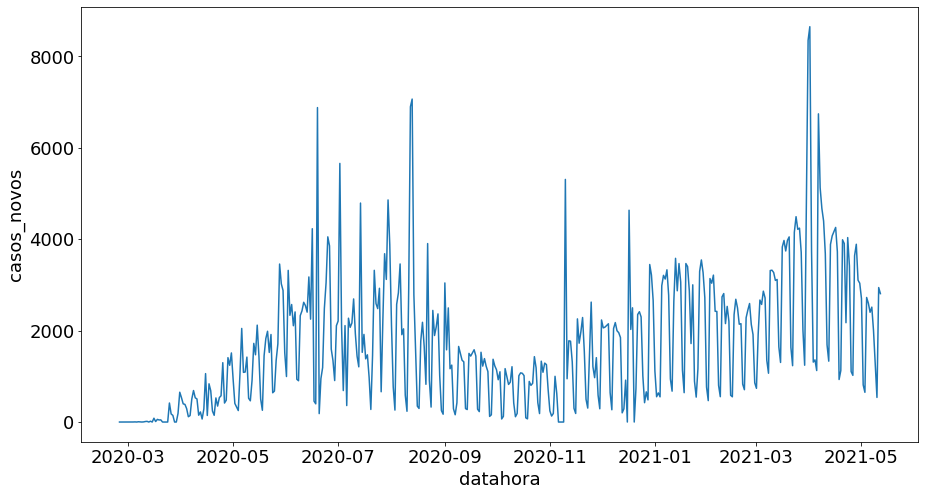

In [64]:
sns.lineplot(x="datahora", y="casos_novos", data = dados_sp)

mostrando um exemplo de diferenciação. Neste exemplo a diferenciação tem uma reta horizontal, pois o crescimento é horizontal e com um mesmo coeficiente que 1. Para gráficos exponenciais haverá variação na diferenciação

In [65]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [66]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [67]:
dados_exemplo["diferenciado"] = dados_exemplo.diff()

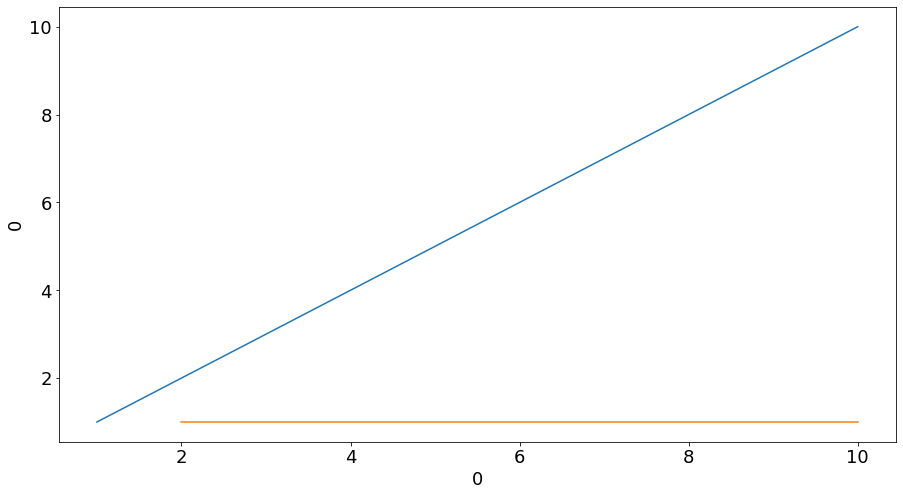

In [68]:
sns.lineplot(data = dados_exemplo,x=0, y=0)
sns.lineplot(data = dados_exemplo,x=0, y='diferenciado')

Fazendo uma diferenciação dos dados de são paulo

In [69]:
dados_sp["taxa_de_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_de_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



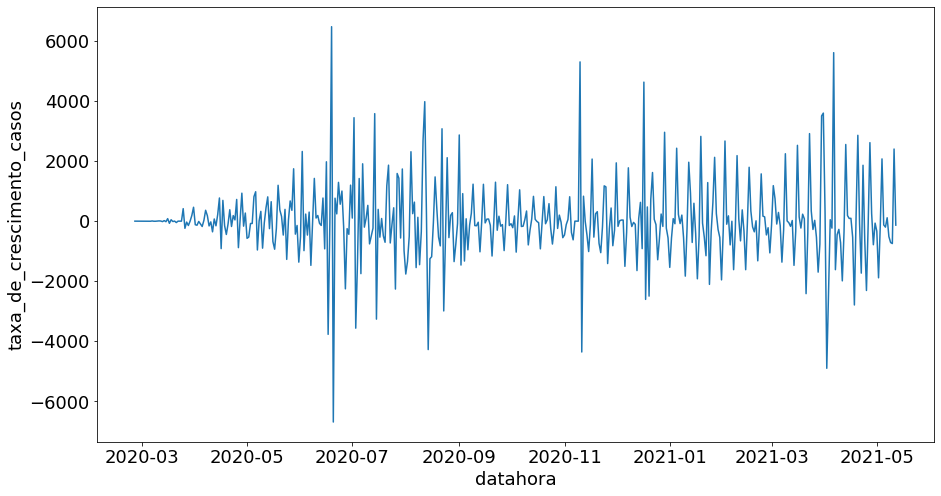

In [70]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_sp)

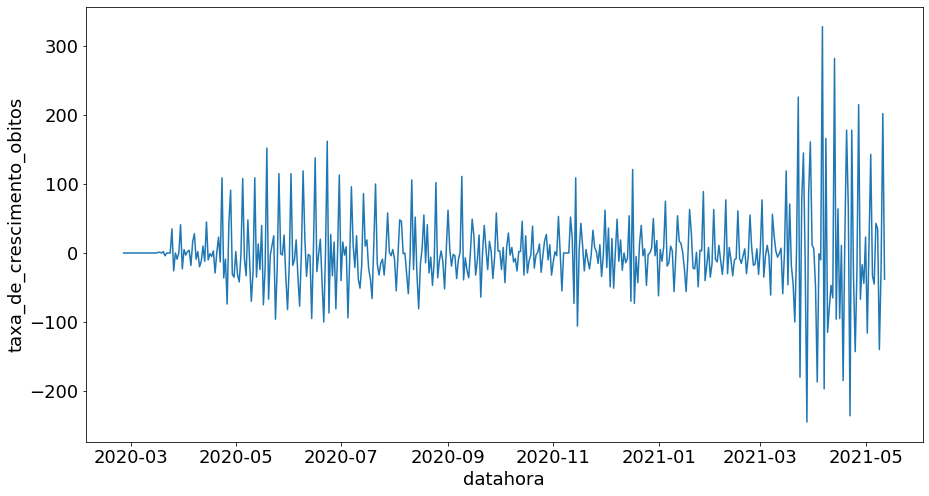

In [71]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp)

<BarContainer object of 443 artists>

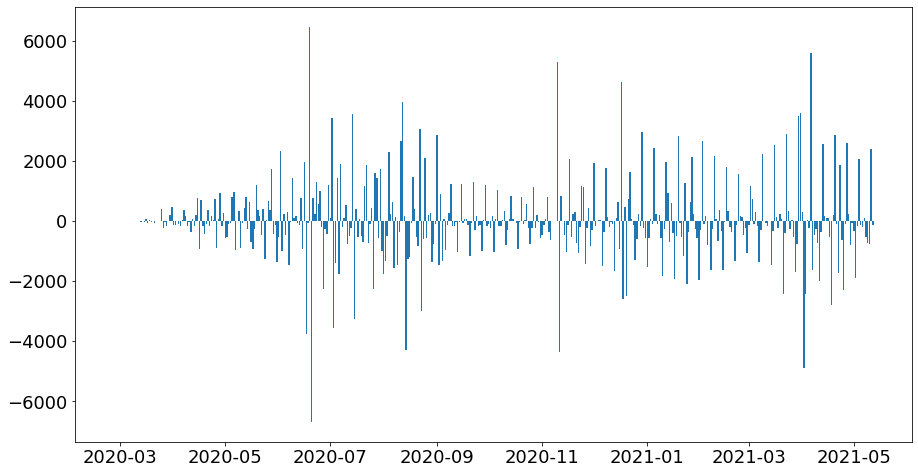

In [72]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [73]:
dados_sp["ano"] = pd.DatetimeIndex(dados_sp["datahora"]).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
dados_2021 = dados_sp.query('ano == "2021"')

<BarContainer object of 132 artists>

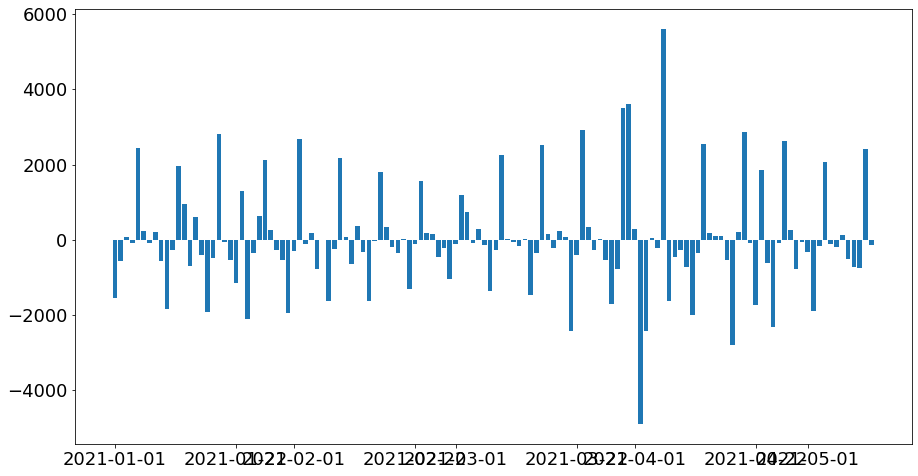

In [75]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

o gráfico acima é mais usado para análise, não é passado para uma pessoa leiga  analisar

Abaixo temos a criação de uma janela de 7 dias para média móvel, ou seja, a cada 7 dias é gerado uma média e vai rolando até o final da dataframe.
## A média móvel serve para suavisar os picos dos gráficos e diminuir o efeito de sazonalidade, mostrando de maneira mais fiel a tendencia destes dados

In [76]:
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7, center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



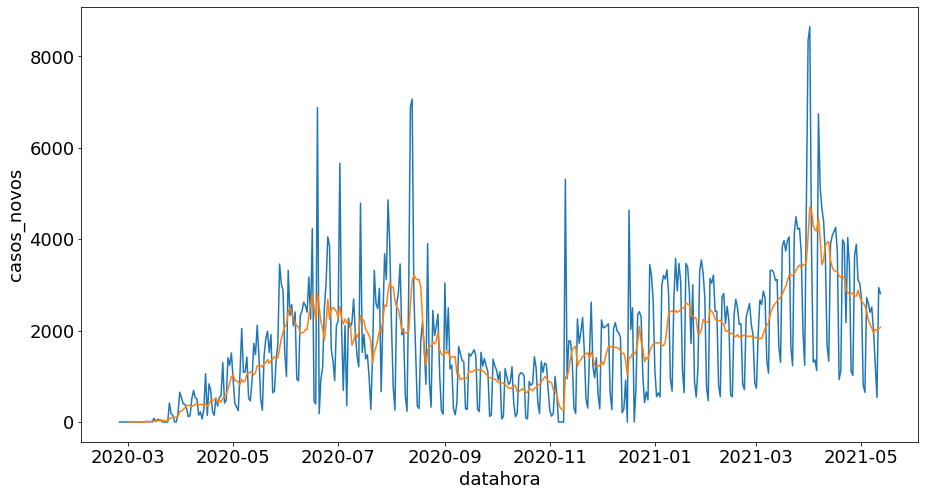

In [77]:
sns.lineplot(x = "datahora", y= "casos_novos", data = dados_sp)
sns.lineplot(x="datahora", y="media_movel_casos", data=dados_sp )

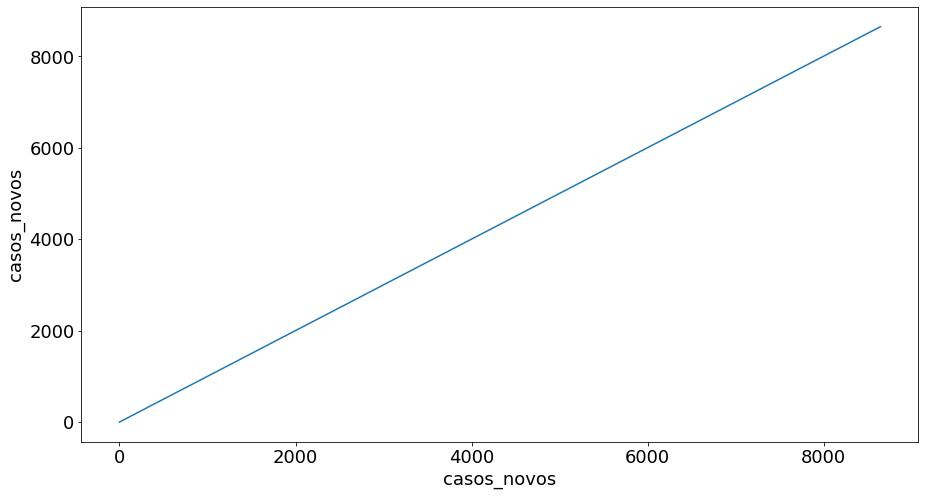

In [78]:
#verificando correlação. Verificando uma correlação perfeita, correlacionando a mesma variável
sns.lineplot(x="casos_novos", y="casos_novos", data = dados_sp)

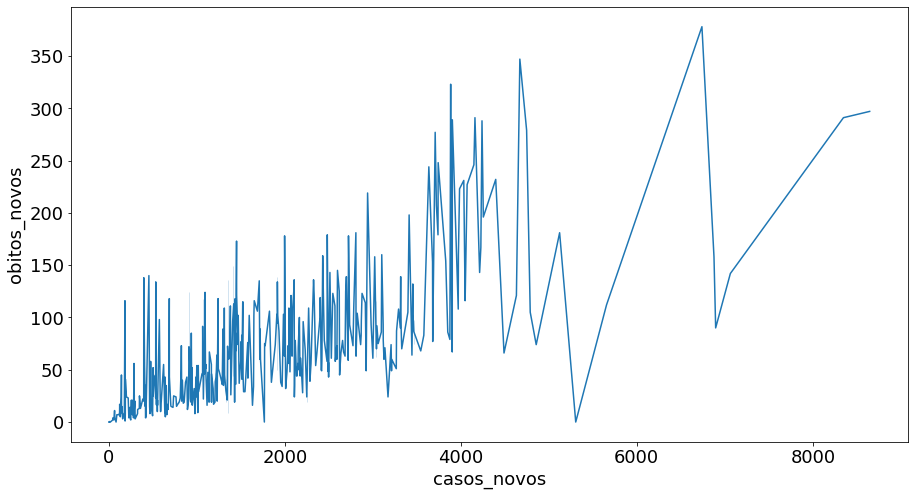

In [79]:
sns.lineplot(x="casos_novos", y="obitos_novos", data = dados_sp)

In [80]:
dados_202005 = dados_sp.query("mes == 5 & ano == 2020")
dados_202101 = dados_sp.query("mes == 1 & ano == 2021")
dados_202102 = dados_sp.query("mes == 2 & ano == 2021")
dados_202103 = dados_sp.query("mes == 3 & ano == 2021")
dados_202104 = dados_sp.query("mes == 4 & ano == 2021")

#Abaixo observamos a sazonalidade dos dados, onde existe um padrão no comportamento dos dados na linha do tempo.

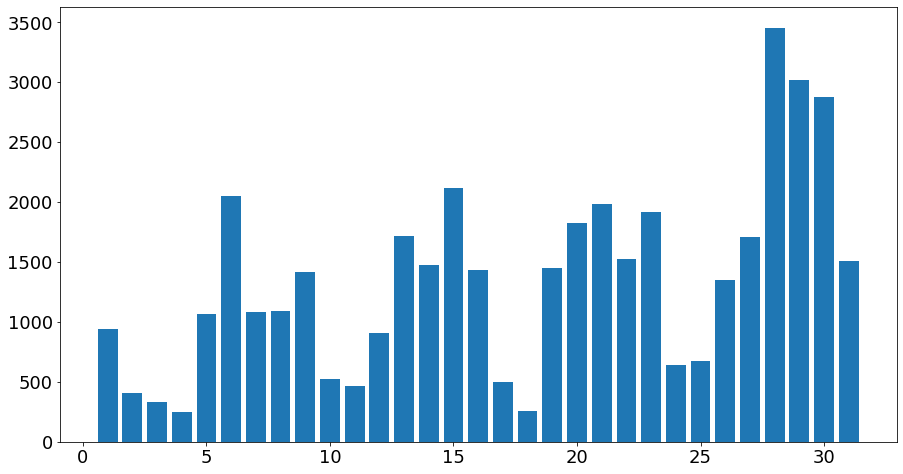

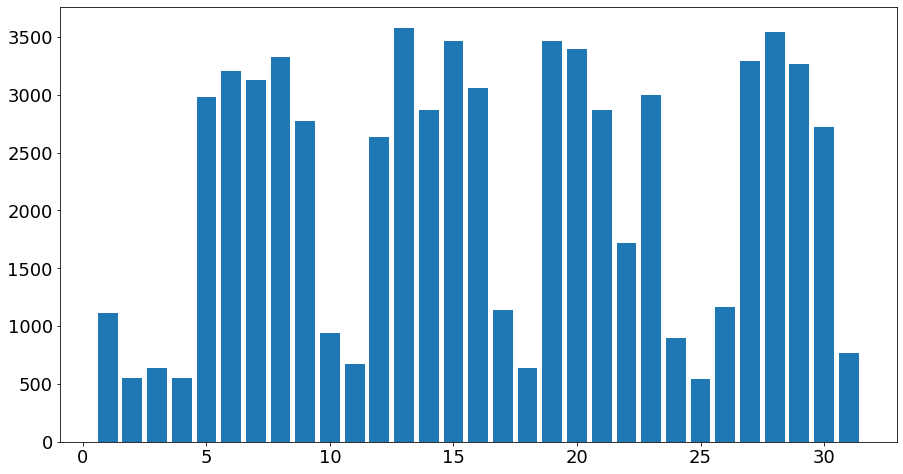

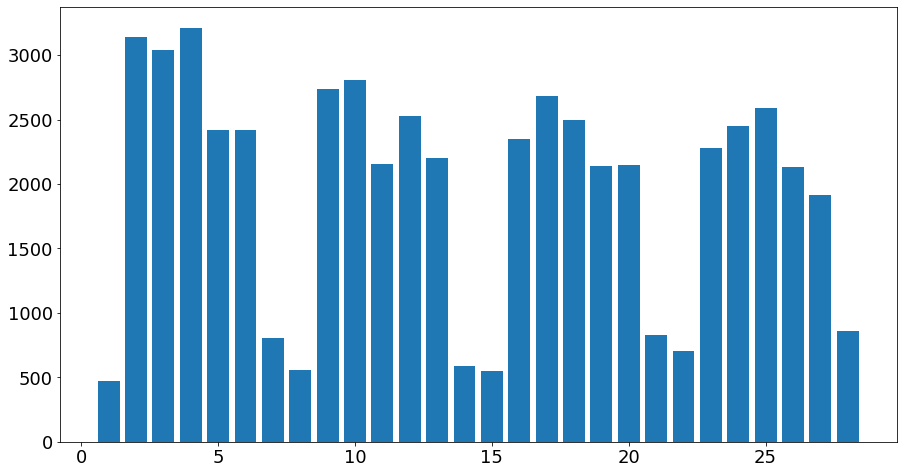

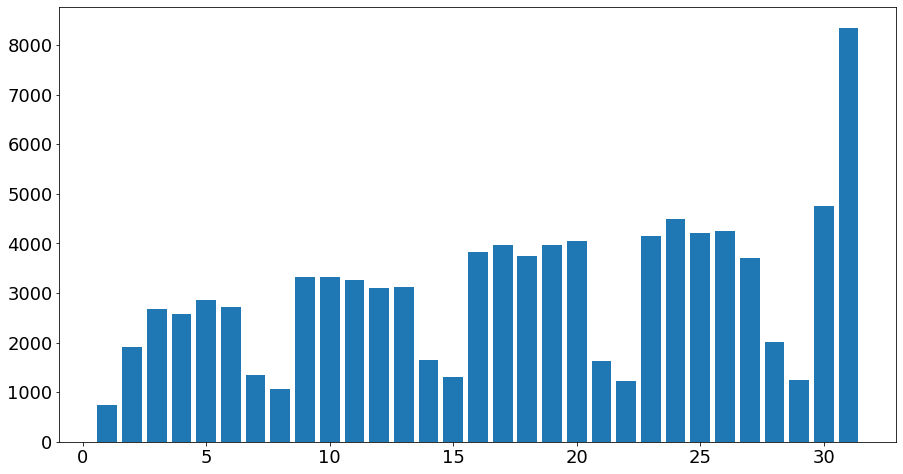

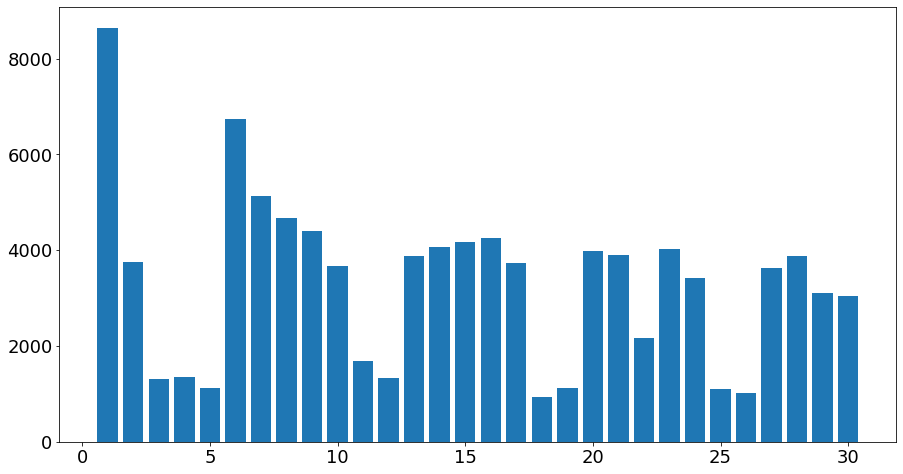

In [81]:
plt.bar(np.linspace(1,31,31),  dados_202005["casos_novos"])
plt.show()
plt.bar(np.linspace(1,31,31),  dados_202101["casos_novos"])
plt.show()
plt.bar(np.linspace(1,28,28),  dados_202102["casos_novos"])
plt.show()
plt.bar(np.linspace(1,31,31),  dados_202103["casos_novos"])
plt.show()
plt.bar(np.linspace(1,30,30),  dados_202104["casos_novos"])
plt.show()

In [82]:
from pandas.plotting import autocorrelation_plot

#O gráfico abaixo mostra que existe uma correlação entre os dados no tempo. A medida que ao tempo passa esta correlação diminui.quanto mais próximo de 0 menos correlação.

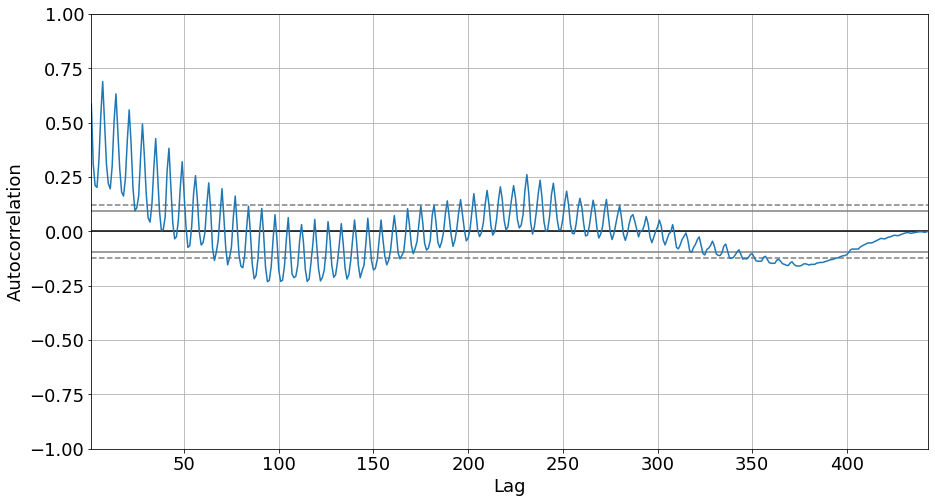

In [83]:
autocorrelation_plot(dados_sp["casos_novos"])

#Abaixo temos um exemplo por meio de numeros aleatórios de correlação baixa.

In [84]:
dados_sp.shape

(443, 31)

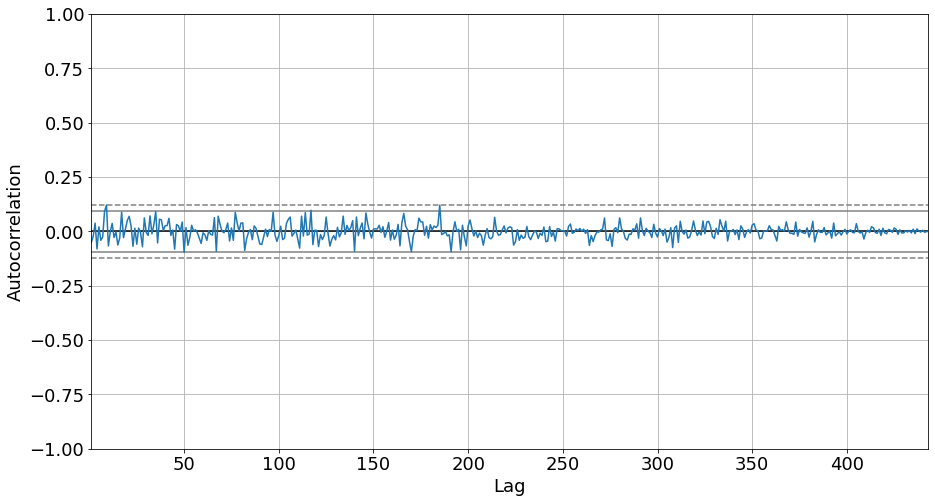

In [85]:
aleatorio = np.random.rand(443)
autocorrelation_plot(aleatorio)

#Módulo 03 Aula 02

In [86]:
df = pd.DataFrame()

In [87]:
df['ds'] = dados_sp['datahora']

In [88]:
df['y'] = dados_sp['casos_novos']

In [89]:
from fbprophet import Prophet

In [90]:
#ajustar uma reta aos dados
modelo = Prophet()

In [91]:
#carregando o modelo com o dataframe
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
dataFramefuturo = modelo.make_future_dataframe(periods=30)

In [93]:
dataFramefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [94]:
previsao = modelo.predict(dataFramefuturo)

In [95]:
#usa o DS e o YHAT para gerar a previsão
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-730.617391,1681.860223,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-673.669741,1671.155968,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-623.590042,1699.229551,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-875.420477,1398.082679,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1275.649208,1224.581023,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200


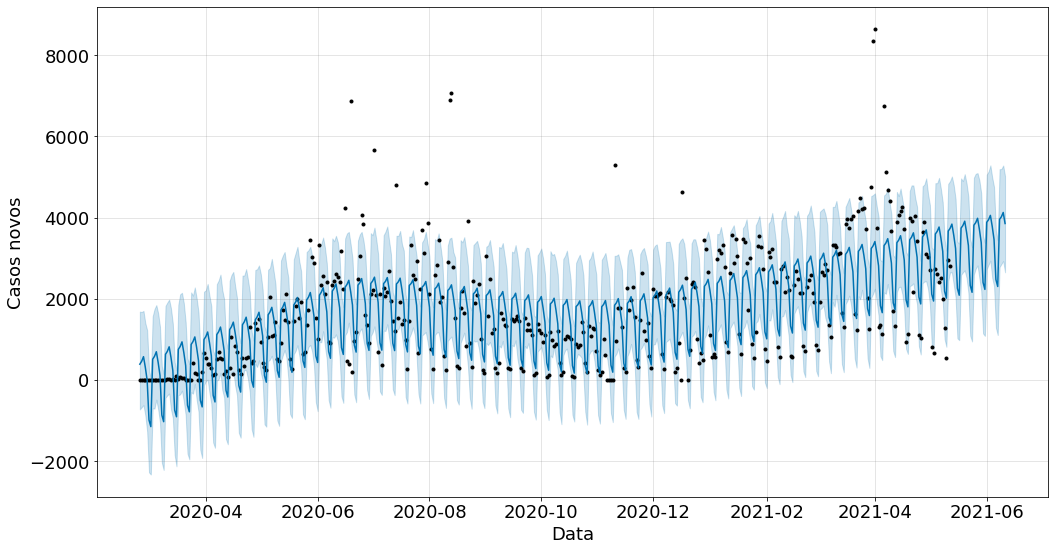

In [96]:
# alinha azul clao é um intervalo de confiança.
# o prophet consegue observar a sazonalidade dos dados. Ele mesmo identifica a sazonalidade.
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(15,8));

Criando teste e ajuste

In [97]:
df2 = pd.DataFrame()
df2['ds'] = dados_sp['datahora'][:400]
df2['y'] = dados_sp['casos_novos'][:400]
from fbprophet import Prophet
modelo2 = Prophet()
modelo2.fit(df2)
dataFramefuturo2 = modelo2.make_future_dataframe(periods=43)
previsao2 = modelo2.predict(dataFramefuturo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
df2_teste = pd.DataFrame()
df2_teste['ds'] = dados_sp['datahora'][400:]
df2_teste['y'] = dados_sp['casos_novos'][400:]

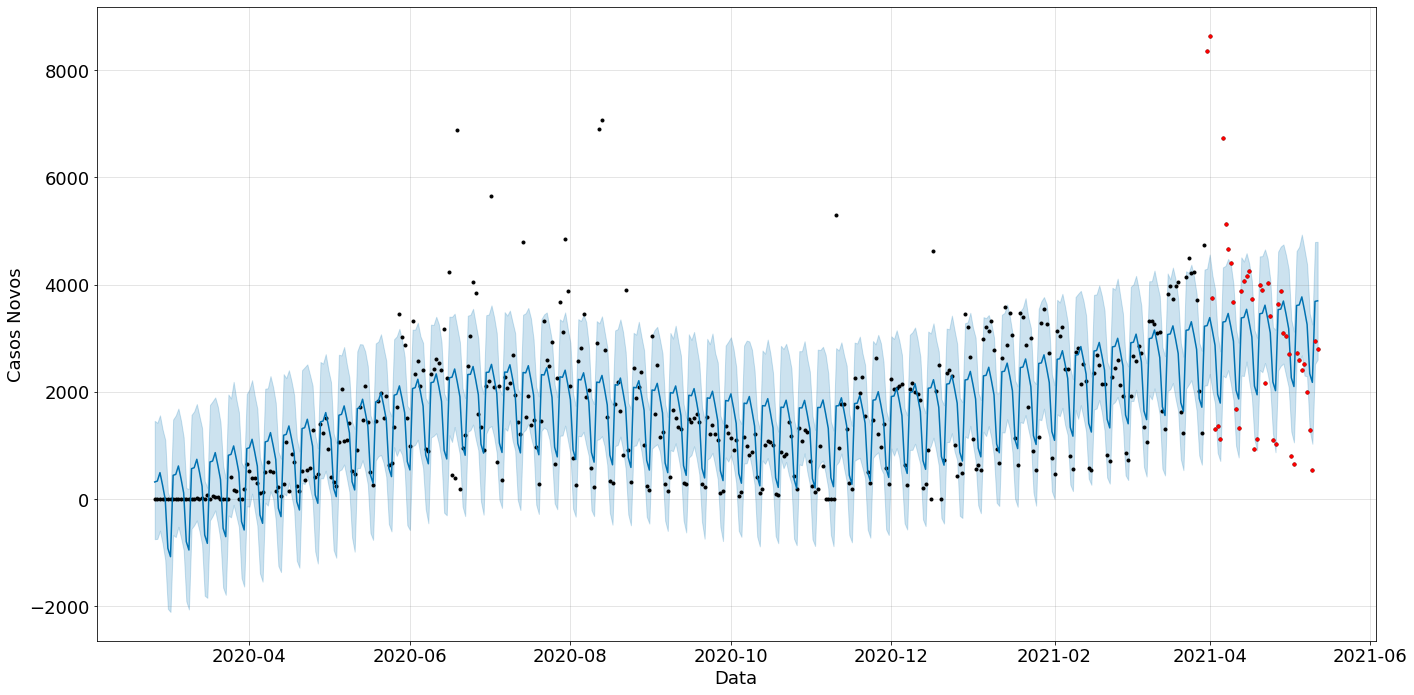

In [99]:
modelo.plot(previsao2, xlabel="Data", ylabel="Casos Novos", figsize=(20,10));
plt.plot(df2_teste['ds'], df2_teste['y'],'.r')

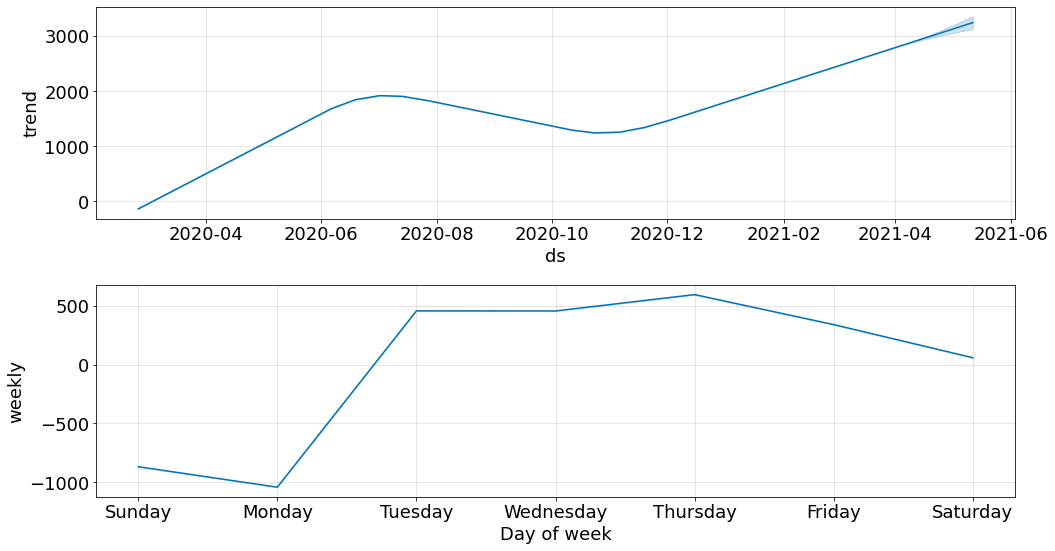

In [100]:
modelo2.plot_components(previsao2, figsize = (15,8));